In [1]:

# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.io import loadmat
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import copy
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import scipy.optimize
import networkx as nx
from sklearn import svm
from scipy.spatial.distance import cdist
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import misc
from datetime import datetime
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.io import loadmat
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import copy
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import scipy.optimize
import networkx as nx
import os
from sklearn import svm
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

In [2]:
# task 2
# Реализуйте функцию случайной инициализации K центров кластеров.

def get_random_centroids_coords(cluster_count=3):
    centroids = np.random.normal(loc=0.5, scale=0.2, size=cluster_count*2)
    return centroids.reshape((cluster_count, 2)) # 2 means x and y coords

In [3]:
# task 4
# Реализуйте функцию пересчета центров кластеров.
def recalculate_centroid(X, centroids, labels):
    centroids = centroids.copy()
    centroids[0, :] = np.mean(X[labels == 0, :], axis=0)
    centroids[1, :] = np.mean(X[labels == 1, :], axis=0)
    centroids[2, :] = np.mean(X[labels == 2, :], axis=0)
    return centroids

In [9]:
def learn(X, cluster_count=3):
    # Прибьём рандомность и насыпем три случайные центроиды для начала
    np.random.seed(seed=42)
    cent_history = kmeans(X, cluster_count)
    show_learn_progress(X, cent_history)
    show_animated_learn_progress(X, cent_history)

In [5]:
def show_learn_progress(X, cent_history):
    plt.figure(figsize=(8, 8))
    for i in range(4):
        labels = cdist(X, cent_history[i]).argmin(axis=1)
        plt.subplot(2, 2, i + 1)
        plt.scatter(X[labels == 0, 0], X[labels == 0, 1], edgecolors="k", s=30, c='red')
        plt.scatter(X[labels == 1, 0], X[labels == 1, 1], edgecolors="k", s=30, c='yellow')
        plt.scatter(X[labels == 2, 0], X[labels == 2, 1], edgecolors="k", s=30, c='green')
        plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'bX')
        plt.title('Step {:}'.format(i + 1))
    plt.show()

In [6]:
def show_animated_learn_progress(X, cent_history):
    fig = plt.figure()

    labels = cdist(X, cent_history[0]).argmin(axis=1)
    cl1, = plt.plot(X[labels == 0, 0], X[labels == 0, 1], 'ro')
    cl2, = plt.plot(X[labels == 1, 0], X[labels == 1, 1], 'yo')
    cl3, = plt.plot(X[labels == 2, 0], X[labels == 2, 1], 'go')
    centers, = plt.plot(cent_history[0][:, 0], cent_history[0][:, 1], 'kX')


    def animate(i):
        labels = cdist(X, cent_history[i]).argmin(axis=1)
        cl1.set_data(X[labels == 0, 0], X[labels == 0, 1])
        cl2.set_data(X[labels == 1, 0], X[labels == 1, 1])
        cl3.set_data(X[labels == 2, 0], X[labels == 2, 1])
        centers.set_data(cent_history[i][:, 0], cent_history[i][:, 1])
        return centers,cl1,cl2,cl3

    # do not delete variable
    anim = FuncAnimation(fig, animate, frames=len(cent_history), interval=500, blit=True, repeat=True)

    plt.show()
    plt.cla()
    plt.clf()
    plt.close()


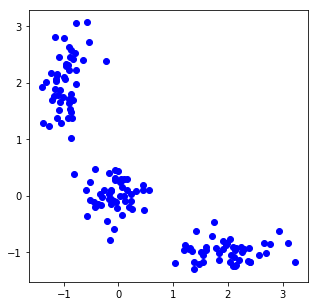

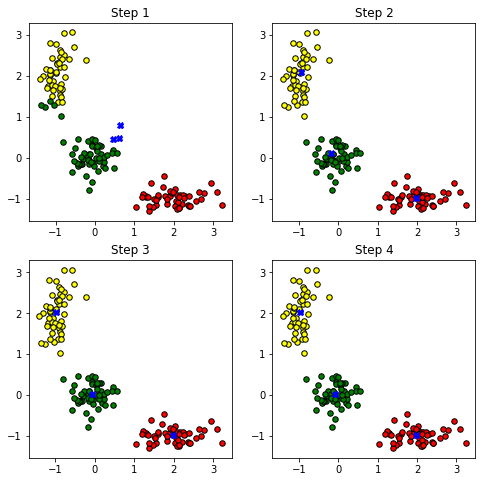

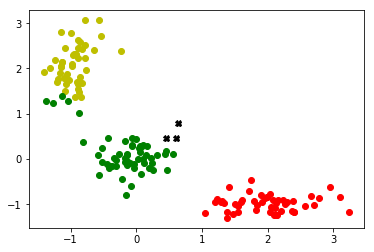

In [21]:
# task 5
# Реализуйте алгоритм K-средних.
def kmeans(X, cluster_count):
    centroids = get_random_centroids_coords(cluster_count)
    cent_history = [centroids]
    for i in range(10):
        # Считаем расстояния от наблюдений до центроид
        # Смотрим, до какой центроиде каждой точке ближе всего
        labels = cdist(X, centroids).argmin(axis=1)
        # Положим в каждую новую центроиду геометрический центр её точек
        # task 3
        # Реализуйте функцию определения принадлежности к кластерам.
        centroids = recalculate_centroid(X, centroids, labels)
        cent_history.append(centroids)
    return cent_history


def get_random_data():
    X = np.zeros((150, 2))
    np.random.seed(seed=42)
    X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
    X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

    X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
    X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

    X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
    X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

    plt.figure(figsize=(5, 5))
    plt.plot(X[:, 0], X[:, 1], 'bo')
    plt.show()
    return X


X = get_random_data()
learn(X)



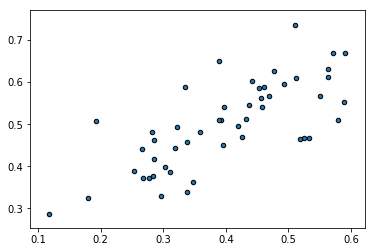

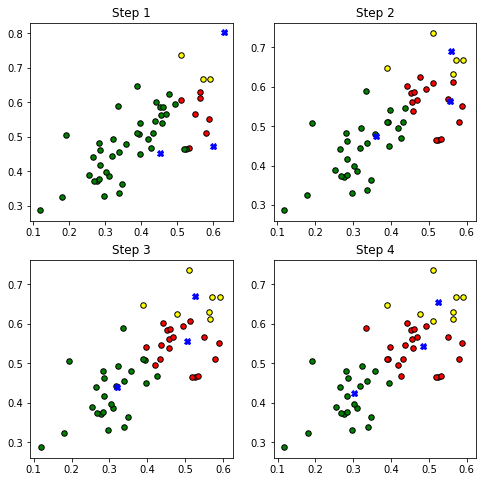

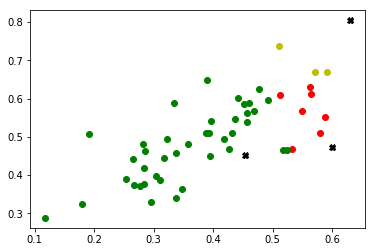

In [22]:
# task 1
# Загрузите данные ex6data1.mat из файла.


def get_task_data():
    data = loadmat('G:/Labs/bsuir-labs/11cem/ml/lab06/data/ex6data1.mat')
    X = data["X"]
    X /= 10
    X0, X1 = X[:, 0], X[:, 1]
    plt.scatter(X0, X1, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.show()
    return X

X = get_task_data()
learn(X)
# task 6
# Постройте график, на котором данные разделены на K=3 кластеров (при помощи различных маркеров или цветов),
# а также траекторию движения центров кластеров в процессе работы алгоритма

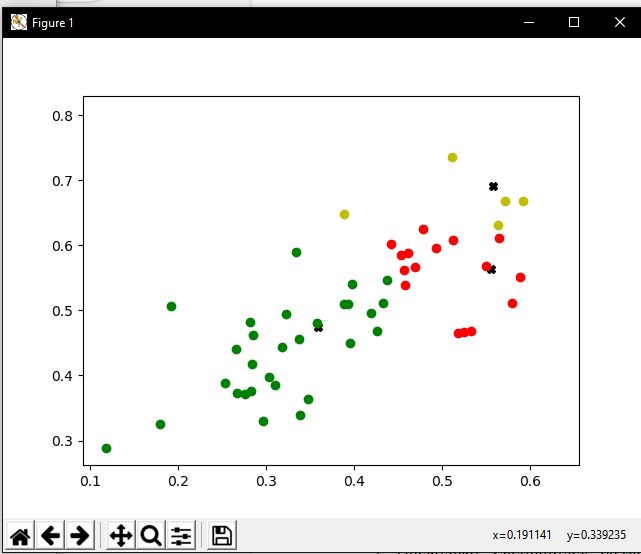

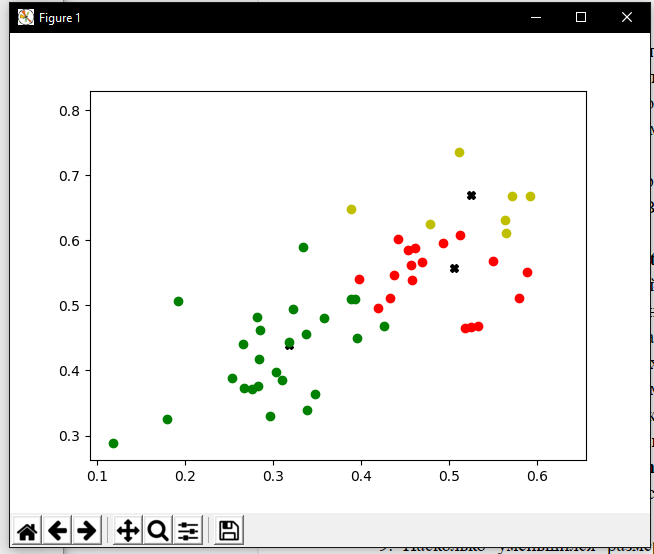

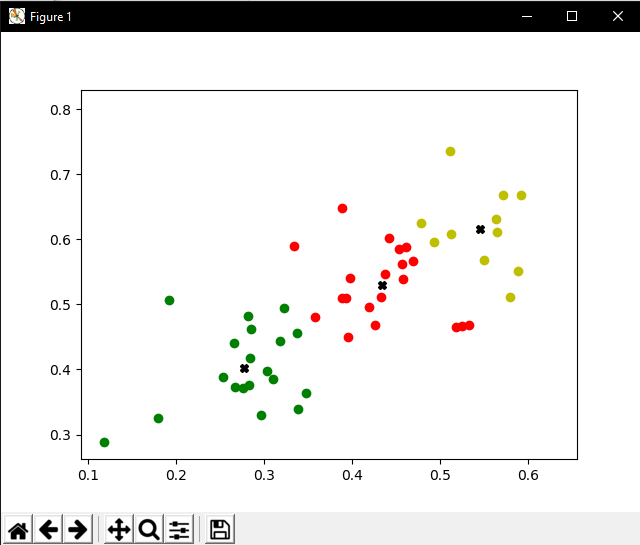

In [14]:

def show_image(img):
    plt.imshow(img)
    plt.show()


def read_mat(path='G:/Labs/bsuir-labs/11cem/ml/lab06/data/bird_small.mat'):
    # loading the png image as a 3d matrix
    img = loadmat(path)["A"]
    show_image(img)
    # scaling it so that the values are small
    return img / 255


def read_png(path='G:/Labs/bsuir-labs/11cem/ml/lab06/horse.png'):
    img = misc.imread(path)
    show_image(img)
    # uncomment the below code to view the loaded image
    return img / 255


def initialize_means(img, clusters):
    # reshaping it or flattening it into a 2d matrix
    points = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))
    m, n = points.shape

    # clusters is the number of clusters 
    # or the number of colors that we choose. 

    # means is the array of assumed means or centroids.  
    means = np.zeros((clusters, n))

    # seed pushing prevents from other results on anoher run
    np.random.seed(seed=42)
    # random initialization of means.  
    for i in range(clusters):
        rand1 = int(np.random.random(1) * 10)
        rand2 = int(np.random.random(1) * 8)
        means[i, 0] = points[rand1, 0]
        means[i, 1] = points[rand2, 1]
    return points, means


# Function to measure the euclidean 
# distance (distance formula) 
def distance(x1, y1, x2, y2):
    dist = np.square(x1 - x2) + np.square(y1 - y2)
    dist = np.sqrt(dist)
    return dist


def k_means(points, centroids, clusters, iterations = 10):
    m, n = points.shape

    # these are the index values that 
    # correspond to the cluster to 
    # which each pixel belongs to. 
    index = np.zeros(m)

    # k-means algorithm.
    centroids_history = [centroids]
    index_history = [index]
    for _ in tqdm(range(iterations)):

        for j in range(len(points)):
            # initialize minimum value to a large value 
            minv = 1000
            for k in range(clusters):

                x_p = points[j, 0]
                y_p = points[j, 1]
                x_c = centroids[k, 0]
                y_c = centroids[k, 1]

                dist = distance(x_p, y_p, x_c, y_c)
                if dist < minv:
                    minv = dist
                    index[j] = k

        for k in range(clusters):
            sumx = 0
            sumy = 0
            count = 0
            for j in range(len(points)):
                if index[j] == k:
                    sumx += points[j, 0]
                    sumy += points[j, 1]
                    count += 1
            count = 1 if count == 0 else count
            centroids[k, 0] = float(sumx / count)
            centroids[k, 1] = float(sumy / count)

        centroids_history.append(centroids)
        index_history.append(index)
    return centroids_history, index_history


def show_result(means, index, img):
    # recovering the compressed image by
    # assigning each pixel to its corresponding centroid. 
    centroid = np.array(means)
    plt.plot(centroid[:,0]*128, centroid[:,1]*128, "wX")
    # plotting the compressed image. 
    meshx, meshy = np.meshgrid(np.arange(128), np.arange(128))
    plt.axis('equal')
    plt.axis('off')
    plt.scatter(meshx, -(meshy - 128), c=100 * (index.reshape(128, 128) + 1) / clusters, cmap='inferno', marker=',')
    plt.show()

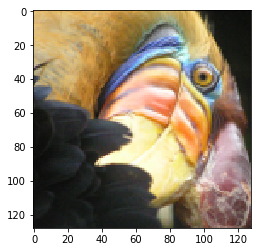

Исходный размер 12288.0 байт


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  3.29it/s]


Размер после кластеризации 768.0 байт
размер уменьшился в 64.0 раз
качествно уменьшено


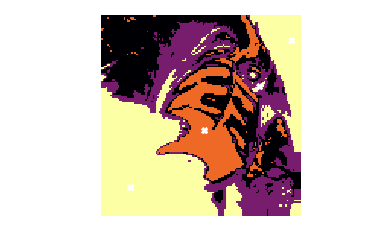

In [15]:


# task 7
img = read_mat()

# task 8
# С помощью алгоритма K-средних используйте 16 цветов для кодирования пикселей.

clusters = 4



# task 9
# Насколько уменьшился размер изображения? Как это сказалось на качестве?
print("Исходный размер {} байт".format((256*3)*128*128/1024))


points, centroid = initialize_means(img, clusters)

centroid, index = k_means(points, centroid, clusters)
print("Размер после кластеризации {} байт".format((16*3)*128*128/1024))
print("размер уменьшился в {} раз".format(256/clusters))
print("качествно уменьшено")
show_result(centroid[-1], index[-1], img)

c:\users\harwister\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


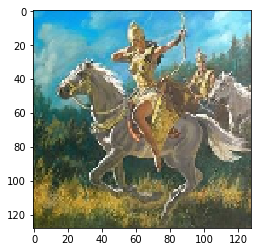

0.15


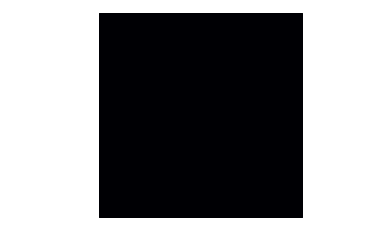

0.075


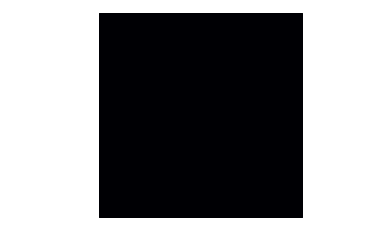

0.0375


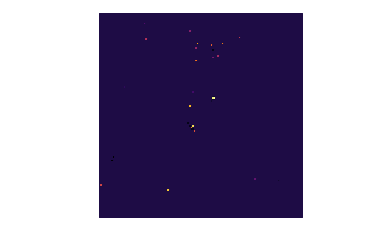

0.01875


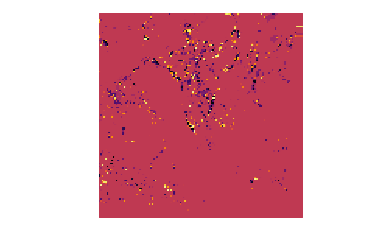

0.009375


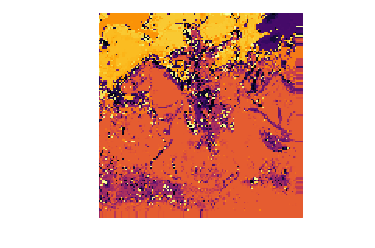

0.0046875


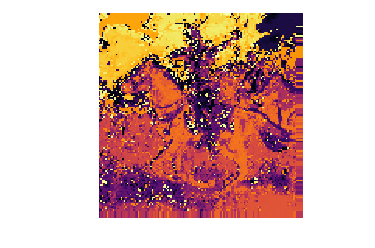

In [19]:
# Начинаем с того, что высыпаем на каждую точку свой кластер
# Сортируем попарные расстояния между центрами кластеров по возрастанию
# Берём пару ближайших кластеров, склеиваем их в один и пересчитываем центр кластера
# Повторяем п. 2 и 3 до тех пор, пока все данные не склеятся в один кластер

def show_image(img):
    plt.imshow(img)
    plt.show()


def read_png(path='G:/Labs/bsuir-labs/11cem/ml/lab06/horse.png'):
    img = misc.imread(path)
    show_image(img)
    # uncomment the below code to view the loaded image
    return img / 255

# task 10
# Реализуйте алгоритм K-средних на другом изображении.

img = read_png()


points = np.reshape(img, (img.shape[0] * img.shape[1], img.shape[2]))

distance_mat = pdist(points) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

# task 11
# Реализуйте алгоритм иерархической кластеризации на том же изображении. Сравните полученные результаты.
# Single linkage — минимум попарных расстояний между точками из двух кластеров
Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
max_d = .3
while max_d > 0.005:
    max_d *= .5
    print(max_d)
    clusters = fcluster(Z, max_d, criterion='distance')
    meshx, meshy = np.meshgrid(np.arange(128), np.arange(128))
    plt.axis('equal')
    plt.axis('off')
    plt.scatter(meshx, -(meshy - 128), c=clusters.reshape(128, 128), cmap='inferno', marker=',')
    plt.show()
